In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img, ImageDataGenerator
import tensorflow as tf

In [ ]:

x_data = []
y_data = []

def loadmydata():
    for item in os.listdir('/content/drive/MyDrive/Explomy/denoising-dirty-documents/train'):

        os.chdir('/content/drive/MyDrive/Explomy/denoising-dirty-documents/train')
        img = load_img(item)
        img = img.resize((540,258)) 
        hori_flippedImage = img.transpose(Image.FLIP_LEFT_RIGHT)
        Vert_flippedImage = img.transpose(Image.FLIP_TOP_BOTTOM)
        hori_Vert_flippedImage = Vert_flippedImage.transpose(Image.FLIP_LEFT_RIGHT)
        arr = img_to_array(img)
        arr1 = img_to_array(hori_flippedImage)
        arr2 = img_to_array(Vert_flippedImage)
        arr3 = img_to_array(hori_Vert_flippedImage)
        x_data.extend([arr, arr1, arr2, arr3])

        os.chdir('/content/drive/MyDrive/Explomy/denoising-dirty-documents/train_cleaned')
        img = load_img(item)
        img = img.resize((540,258))
        hori_flippedImage = img.transpose(Image.FLIP_LEFT_RIGHT)
        Vert_flippedImage = img.transpose(Image.FLIP_TOP_BOTTOM)
        hori_Vert_flippedImage = Vert_flippedImage.transpose(Image.FLIP_LEFT_RIGHT)
        arr = img_to_array(img)
        arr1 = img_to_array(hori_flippedImage)
        arr2 = img_to_array(Vert_flippedImage)
        arr3 = img_to_array(hori_Vert_flippedImage)
        y_data.extend([arr, arr1, arr2,])
        
loadmydata()

In [ ]:
x_data = tf.image.rgb_to_grayscale(x_data)
y_data = tf.image.rgb_to_grayscale(y_data)

In [ ]:
print(x_data[0].shape, y_data[0].shape)
y_data.shape

(258, 540, 1) (258, 540, 1)


TensorShape([576, 258, 540, 1])

In [ ]:
for i in range(0,24):
    x = x_data[i]
    y = y_data[i]
    
    plt.figure(figsize=(100,100))
    plt.subplot(10,10,1)
    plt.axis("off")
    plt.imshow(array_to_img(x),cmap="gray")
    plt.subplot(10,10,2)
    plt.axis("off")
    plt.imshow(array_to_img(y),cmap="gray")

In [ ]:
import random
 
def getNum(v) :
    n = len(v)
    index = random.randint(0, n - 1)
    num = v[index]
    v[index], v[n - 1] = v[n - 1], v[index]
    v.pop()
    return num

def generateRandom(n) : 
    v = [0] * n
    for i in range(n) :
        v[i] = i 
    while (len(v)) :
        print(getNum(v), end = " ")

In [ ]:
n = x_data.shape[0]
print(n)
generateRandom(n)

576
543 430 116 401 495 515 327 282 362 483 24 109 274 324 496 288 400 399 28 449 225 364 510 141 370 39 287 533 135 375 76 68 500 542 404 16 138 112 347 381 367 312 442 164 395 250 61 263 438 276 92 470 185 431 499 453 194 550 380 360 524 528 202 474 303 218 326 306 213 1 450 552 391 267 146 534 489 298 341 334 397 186 47 328 118 231 382 64 408 161 144 60 396 253 97 433 162 273 319 469 513 10 195 344 15 452 330 548 32 560 572 529 279 79 538 275 545 212 508 307 544 157 421 37 569 356 183 462 463 302 217 383 527 357 342 200 256 458 219 260 192 498 13 573 389 177 189 329 48 122 428 38 70 311 145 363 220 339 292 352 547 290 320 102 291 333 490 175 83 378 297 475 223 139 34 227 284 541 224 472 466 553 379 277 123 50 374 30 8 385 434 159 464 53 124 539 407 234 130 153 571 511 86 517 366 558 66 210 520 454 361 468 121 492 518 494 487 255 119 238 261 304 575 435 42 152 257 415 294 22 310 570 336 359 436 254 523 179 51 354 471 67 147 230 427 73 198 150 215 459 176 49 403 184 530 295 535 574 35

In [ ]:
x_data1 = []
y_data1 = []
v = [0] * n
for i in range(n) :
    v[i] = i 
while (len(v)) :
    i = getNum(v)
    x_data1.append(x_data[i])
    y_data1.append(y_data[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


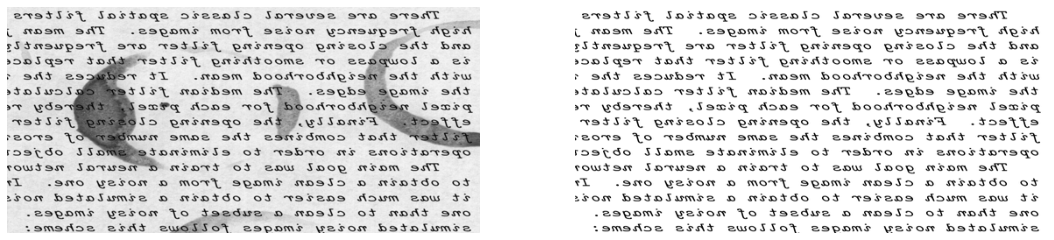

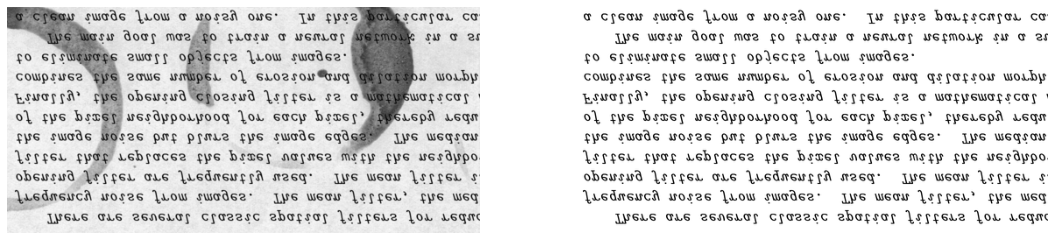

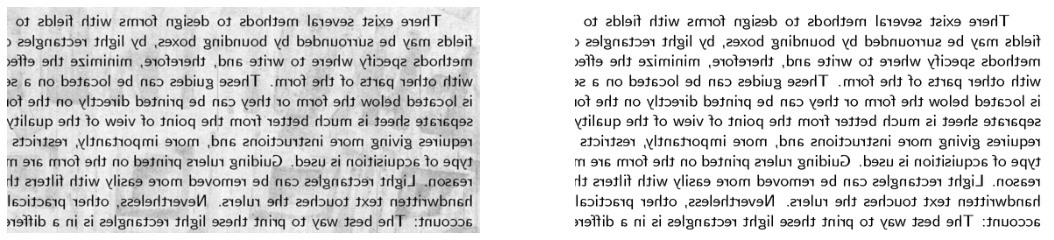

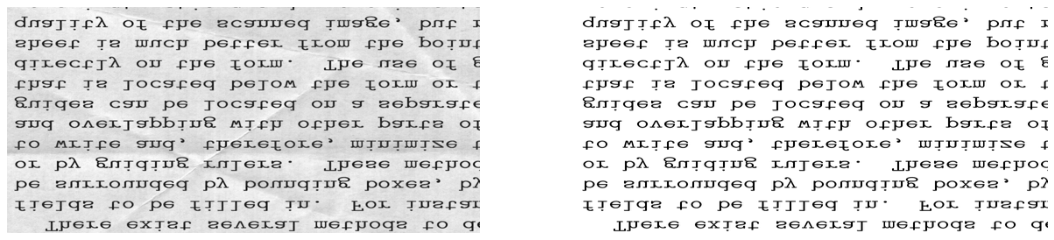

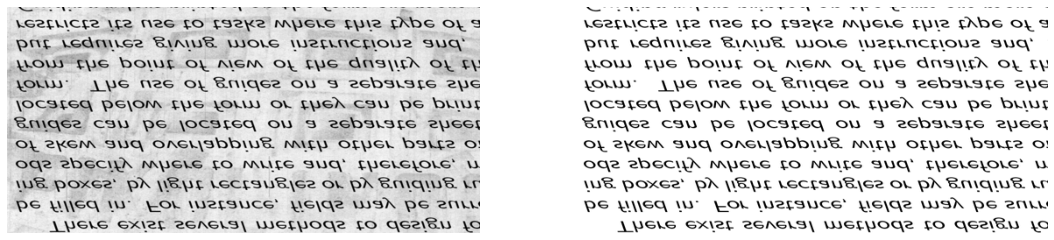

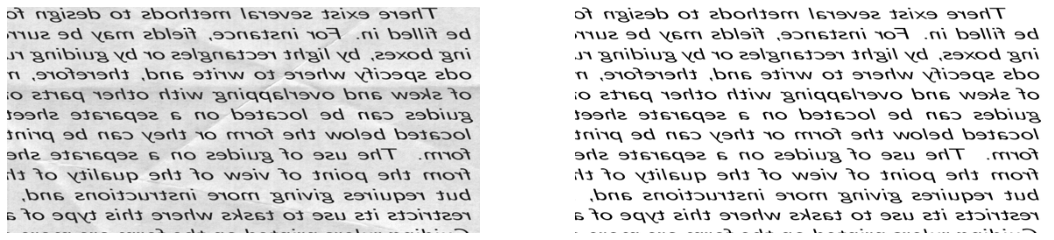

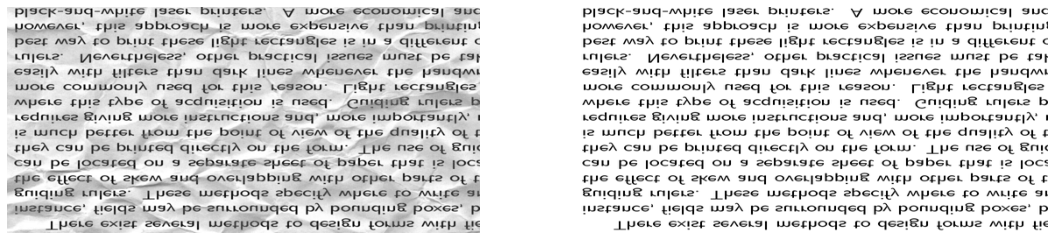

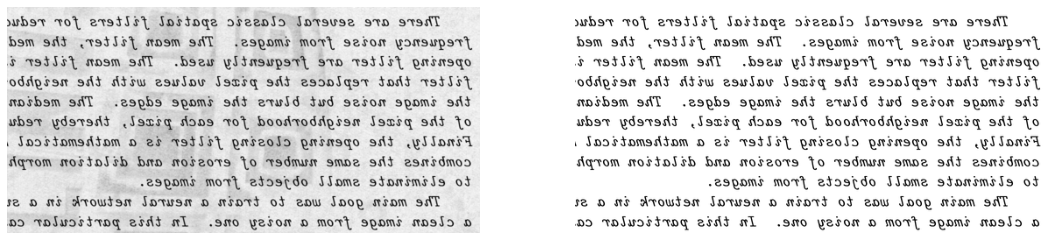

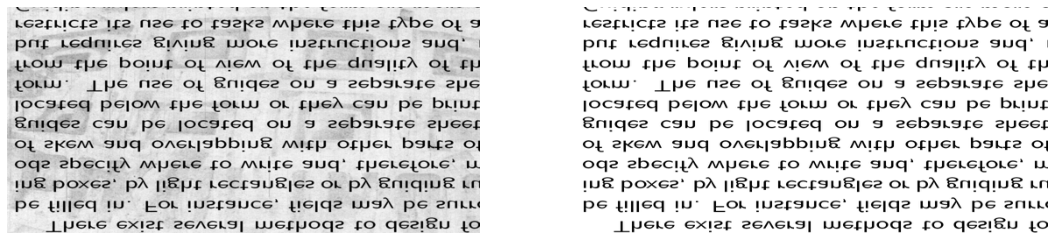

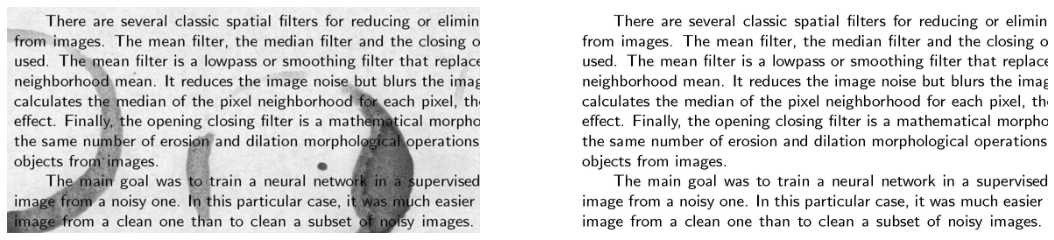

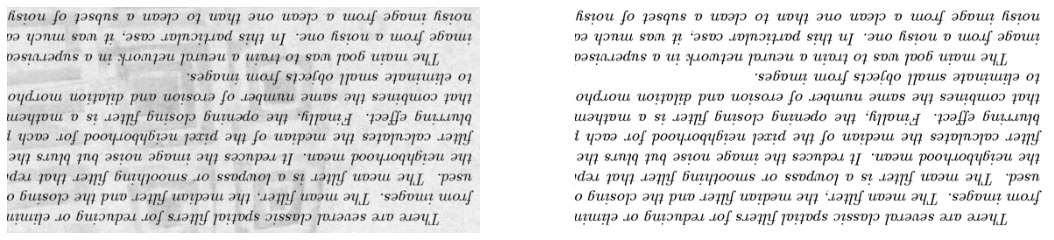

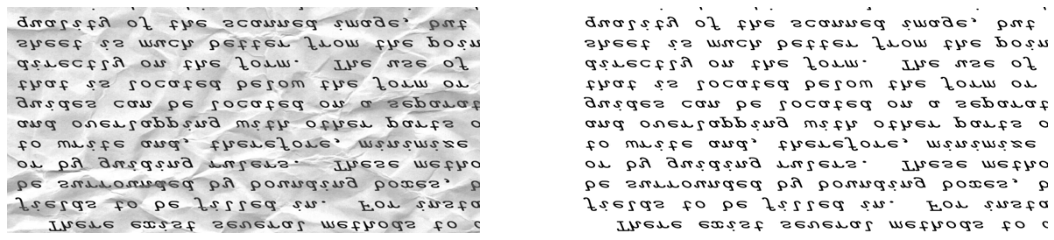

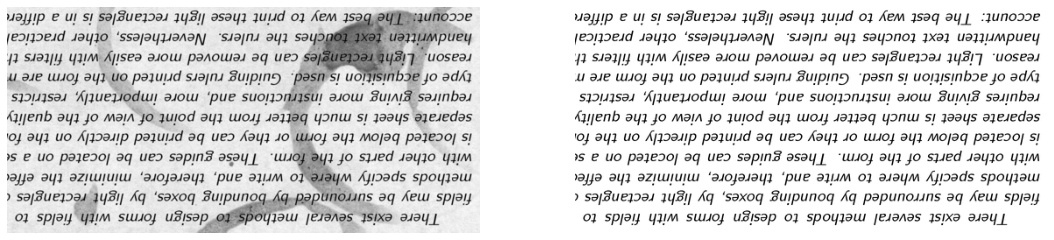

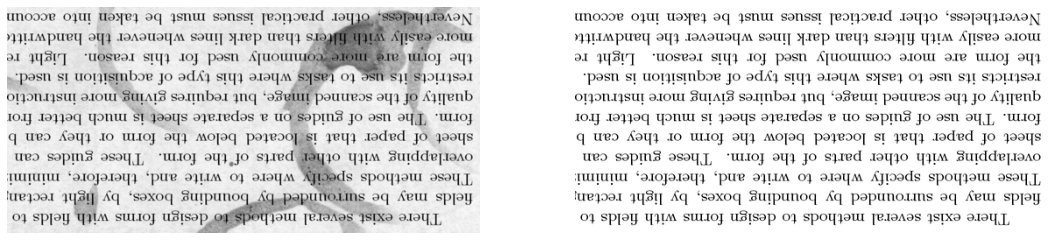

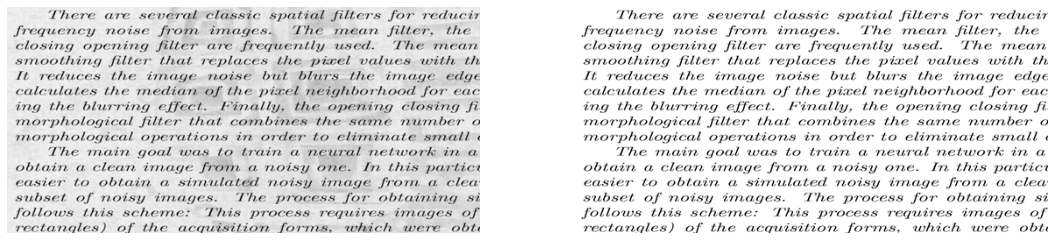

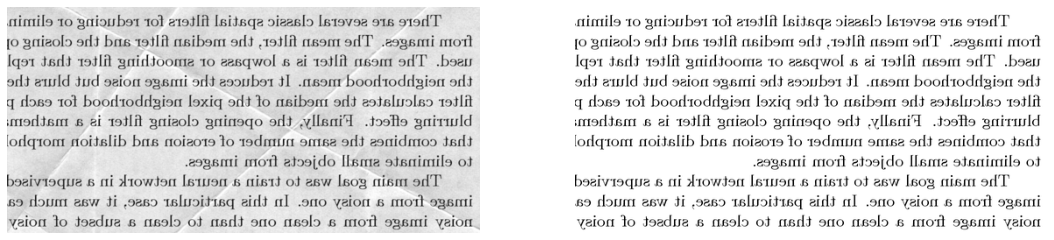

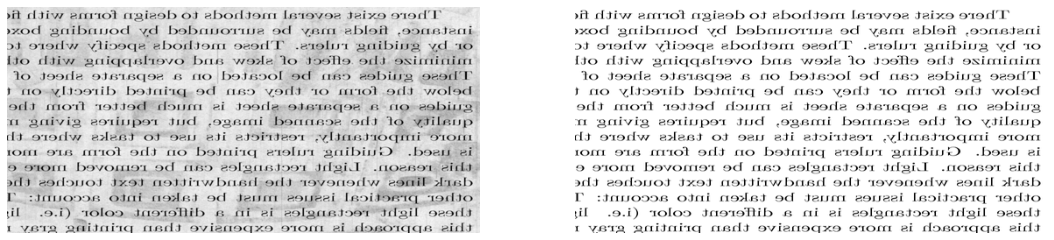

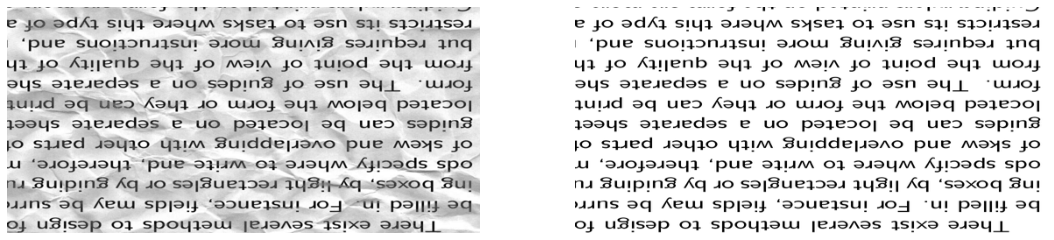

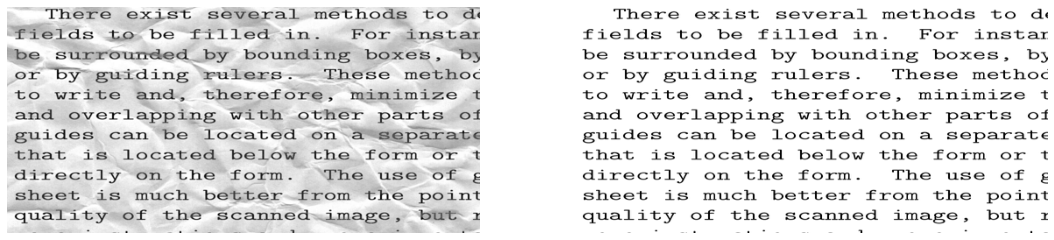

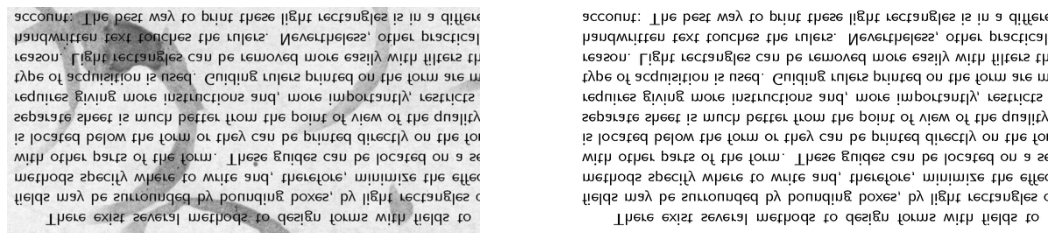

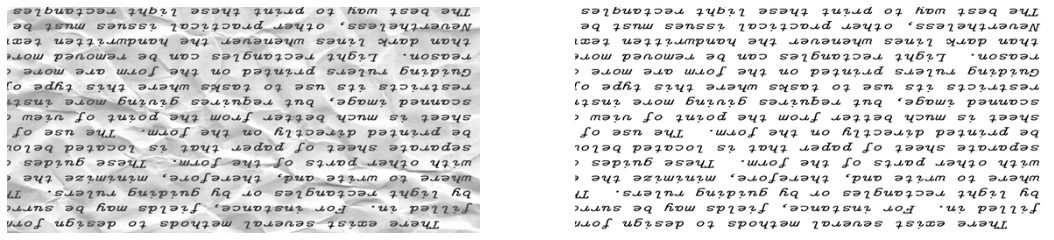

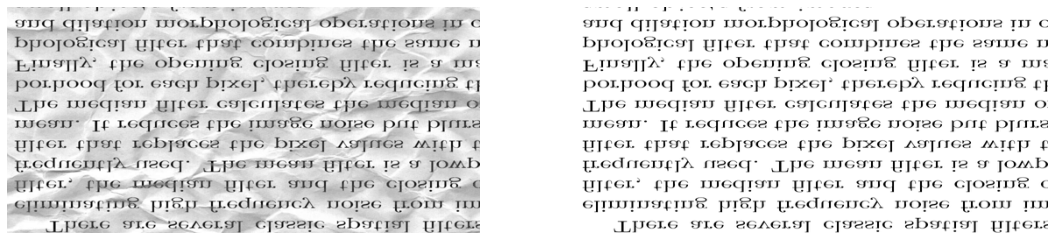

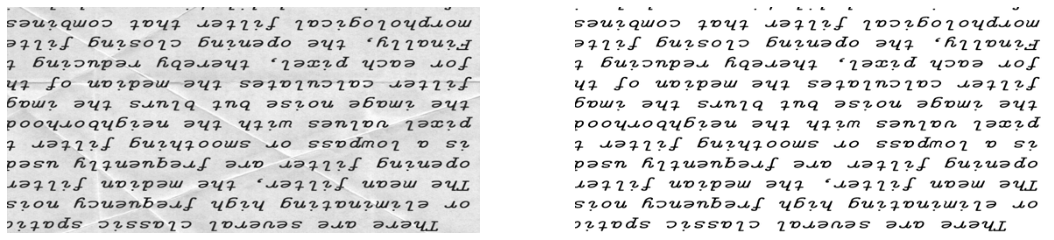

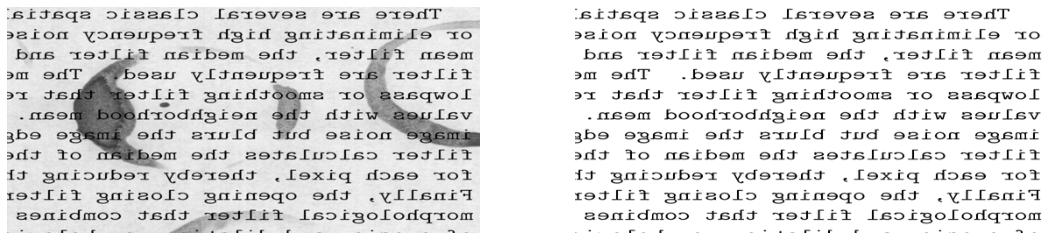

In [ ]:
for i in range(0,24):
    x = x_data1[i]
    y = y_data1[i]
    
    plt.figure(figsize=(100,100))
    plt.subplot(10,10,1)
    plt.axis("off")
    plt.imshow(array_to_img(x),cmap="gray")
    plt.subplot(10,10,2)
    plt.axis("off")
    plt.imshow(array_to_img(y),cmap="gray")

In [ ]:
import pickle
with open('/content/drive/MyDrive/Explomy/Datasetprepro/X.pickle','wb') as f:
    pickle.dump(x_data1,f)
with open('/content/drive/MyDrive/Explomy/Datasetprepro/y.pickle','wb') as f:
    pickle.dump(y_data1,f)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data1,y_data1,test_size=0.13,random_state=42)

In [ ]:
np.array(x_train).shape

(501, 258, 540, 1)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Explomy/Datasetprepro/x_train.pickle','wb') as f:
    pickle.dump(x_train,f)
with open('/content/drive/MyDrive/Explomy/Datasetprepro/x_test.pickle','wb') as f:
    pickle.dump(x_test,f)

In [ ]:
with open('/content/drive/MyDrive/Explomy/Datasetprepro/y_train.pickle','wb') as f:
    pickle.dump(y_train,f)
with open('/content/drive/MyDrive/Explomy/Datasetprepro/y_test.pickle','wb') as f:
    pickle.dump(y_test,f)

In [ ]:

def savemydata(path):

    for i in range(len(x_train)):
        os.chdir(path + '/x_train')
        #img = array_to_img(x_train[i])
        img = x_train[i]
        save_img(f'{i}.png', img)

    for i in range(len(x_test)):
        os.chdir(path + '/x_test')
        #img = array_to_img(x_test[i])
        img = x_test[i]
        save_img(f'{i}.png', img)

    for i in range(len(y_train)):
        os.chdir(path + '/y_train')
        #img = array_to_img(y_train[i])
        img = y_train[i]
        save_img(f'{i}.png', img)

    for i in range(len(y_test)):
        os.chdir(path + '/y_test')
        #img = array_to_img(y_test[i])
        img = y_test[i]
        save_img(f'{i}.png', img)
        
savemydata('/content/drive/MyDrive/Explomy/Final_data')